# OCOM510M Data Science: Assessment 2

Student ID:

## 1. Aims, objectives and plan
Although we have already stated what is required, please formally state the aims and objectives of the project in your own words. 100-200 words.

Please demonstrate how you have conducted the project with a simple Gantt chart.

## 🧠 Problem Definition

An insurance company wants to leverage its historical claim data to predict whether a claim is fraudulent or genuine. The goal is to develop a predictive model that can **flag potential fraud cases for referral**, minimizing both:

- **False Positives** (referring genuine claims, which causes customer loss and stress)
- **False Negatives** (failing to detect fraudulent claims, which leads to financial loss)

A balanced and unbiased model is required, ideally achieving a **balanced error rate close to 5%**.

The business also seeks to quantify the **financial impact of model prediction errors**, particularly the cost associated with **losing customers (FP)** and **paying fraudulent claims (FN)**. This will be done using a pricing model based on average claim value, claim rate, and company overhead.

---

## 🔧 Techniques Used

### 1. Logistic Regression (Baseline Classification Model)

- A simple, interpretable, and widely-used model for binary classification.
- Outputs probability scores that allow threshold tuning for better trade-offs between false positives and false negatives.
- Used to establish a baseline for performance.
- Evaluation metrics include confusion matrix, precision, recall, F1-score, and ROC-AUC.

### 2. Random Forest Classifier (Ensemble Model)

- A powerful tree-based ensemble method that handles non-linear patterns and mixed data types well.
- Less prone to overfitting compared to individual decision trees.
- Can manage imbalanced datasets with built-in support for class weighting.
- Provides feature importance scores for interpretability.
- Performance is evaluated using the same metrics as Logistic Regression, with a focus on minimizing business impact through cost analysis of false positives and false negatives.



In [90]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from IPython.display import display
from functools import reduce
import matplotlib.pyplot as plt

In [91]:
raw_tc_df = pd.read_csv('./TrainData/Train_Claim.csv')
raw_td_df = pd.read_csv('./TrainData/Train_Demographics.csv')
raw_tp_df = pd.read_csv('./TrainData/Train_Policy.csv')
raw_tv_df = pd.read_csv('./TrainData/Train_Vehicle.csv')
raw_t_df = pd.read_csv('./TrainData/Traindata_with_Target.csv')

display(raw_tc_df.head())
display(raw_td_df.head())
display(raw_tp_df.head())
display(raw_tv_df.head())
display(raw_t_df.head())


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [92]:
# Checkig if CustomerId is Repeating i.e value_count > 1
display('Train Claim' , raw_tc_df['CustomerID'].value_counts()[lambda x : x>1])
display('Train Demographics',raw_td_df['CustomerID'].value_counts()[lambda x : x >1])
display('Train Policy',raw_tp_df['CustomerID'].value_counts()[lambda x : x > 1])
display('Train Vehicle',raw_tv_df['CustomerID'].value_counts()[lambda x : x > 1])


'Train Claim'

Series([], Name: count, dtype: int64)

'Train Demographics'

Series([], Name: count, dtype: int64)

'Train Policy'

Series([], Name: count, dtype: int64)

'Train Vehicle'

CustomerID
Cust20179    4
Cust23045    4
Cust3818     4
Cust7461     4
Cust16944    4
            ..
Cust30090    4
Cust9783     4
Cust20478    4
Cust35879    4
Cust15237    4
Name: count, Length: 28836, dtype: int64

## Concluded from above
Only in `train_vehicle` table customerId are repeating 

In [93]:
# Pivot Train Vehicle Table 
pvt_tv_df = raw_tv_df.pivot_table(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails',aggfunc='first').reset_index()

# Check null values
pvt_tv_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    28836 non-null  object
 1   VehicleID     28836 non-null  object
 2   VehicleMake   28836 non-null  object
 3   VehicleModel  28836 non-null  object
 4   VehicleYOM    28836 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [94]:
# Look Info

display(raw_tc_df.info())
display(raw_td_df.info())
display(raw_tp_df.info())
display(pvt_tv_df.info())
display(raw_t_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   DateOfIncident         28836 non-null  object
 2   TypeOfIncident         28836 non-null  object
 3   TypeOfCollission       28836 non-null  object
 4   SeverityOfIncident     28836 non-null  object
 5   AuthoritiesContacted   26144 non-null  object
 6   IncidentState          28836 non-null  object
 7   IncidentCity           28836 non-null  object
 8   IncidentAddress        28836 non-null  object
 9   IncidentTime           28836 non-null  int64 
 10  NumberOfVehicles       28836 non-null  int64 
 11  PropertyDamage         28836 non-null  object
 12  BodilyInjuries         28836 non-null  int64 
 13  Witnesses              28836 non-null  object
 14  PoliceReport           28836 non-null  object
 15  AmountOfTotalClaim 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28836 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    28836 non-null  object
 1   VehicleID     28836 non-null  object
 2   VehicleMake   28836 non-null  object
 3   VehicleModel  28836 non-null  object
 4   VehicleYOM    28836 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     28836 non-null  object
 1   ReportedFraud  28836 non-null  object
dtypes: object(2)
memory usage: 450.7+ KB


None

## Concluded from above
All Tables have `28836` records and `no null` values in `any` table

In [95]:
## Merge all 5 Tables on CustomerId
print('Train Claims Shape:' , raw_tc_df.shape)
print('Train Demographic Shape:' , raw_td_df.shape)
print('Train Policy Shape:' , raw_tp_df.shape)
print('Train Vehicle Shape:' , pvt_tv_df.shape)
print('Train Target Shape:' , raw_t_df.shape)

merged_df:DataFrame = reduce(lambda left,right : pd.merge(left,right,how='inner',on='CustomerID'), [raw_tc_df,raw_td_df,raw_tp_df,pvt_tv_df,raw_t_df])

print('Merged Table Shape:' , merged_df.shape)
print('Total Columns in Merged is equal to adition of all coulmns from individual tables ? ', (raw_tc_df.shape[1] +  raw_td_df.shape[1] + raw_tp_df.shape[1] +  pvt_tv_df.shape[1] + raw_t_df.shape[1] - 4 ) == merged_df.shape[1])

pd.set_option('display.max_columns', 42)
merged_df.head()

Train Claims Shape: (28836, 19)
Train Demographic Shape: (28836, 10)
Train Policy Shape: (28836, 10)
Train Vehicle Shape: (28836, 5)
Train Target Shape: (28836, 2)
Merged Table Shape: (28836, 42)
Total Columns in Merged is equal to adition of all coulmns from individual tables ?  True


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


In [96]:
# Look for missing and duplicate
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        26144 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

In [97]:
print('Before Deduplicate' , merged_df.shape)
merged_df.drop_duplicates(inplace=True)
print('After Deduplicate' , merged_df.shape)

Before Deduplicate (28836, 42)
After Deduplicate (28836, 42)


## Data Cleaning 
 - DateOfIncident from Object  to Date Format
 - Witnesses from Object  to int64
 - AmountOfTotalClaim from Object  to float64
 - DateOfPolicyCoverage from Object  to Date Format
 - Policy_CombinedSingleLimit Split into 2 features
 - VehicleYOM from Object  to int64

/var/folders/2q/4h8qwwsx6t5446pyq1l03mjh0000gn/T/ipykernel_92294/1138944992.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([merged_df[col].dropna() for col in numeric_cols], labels=numeric_cols)


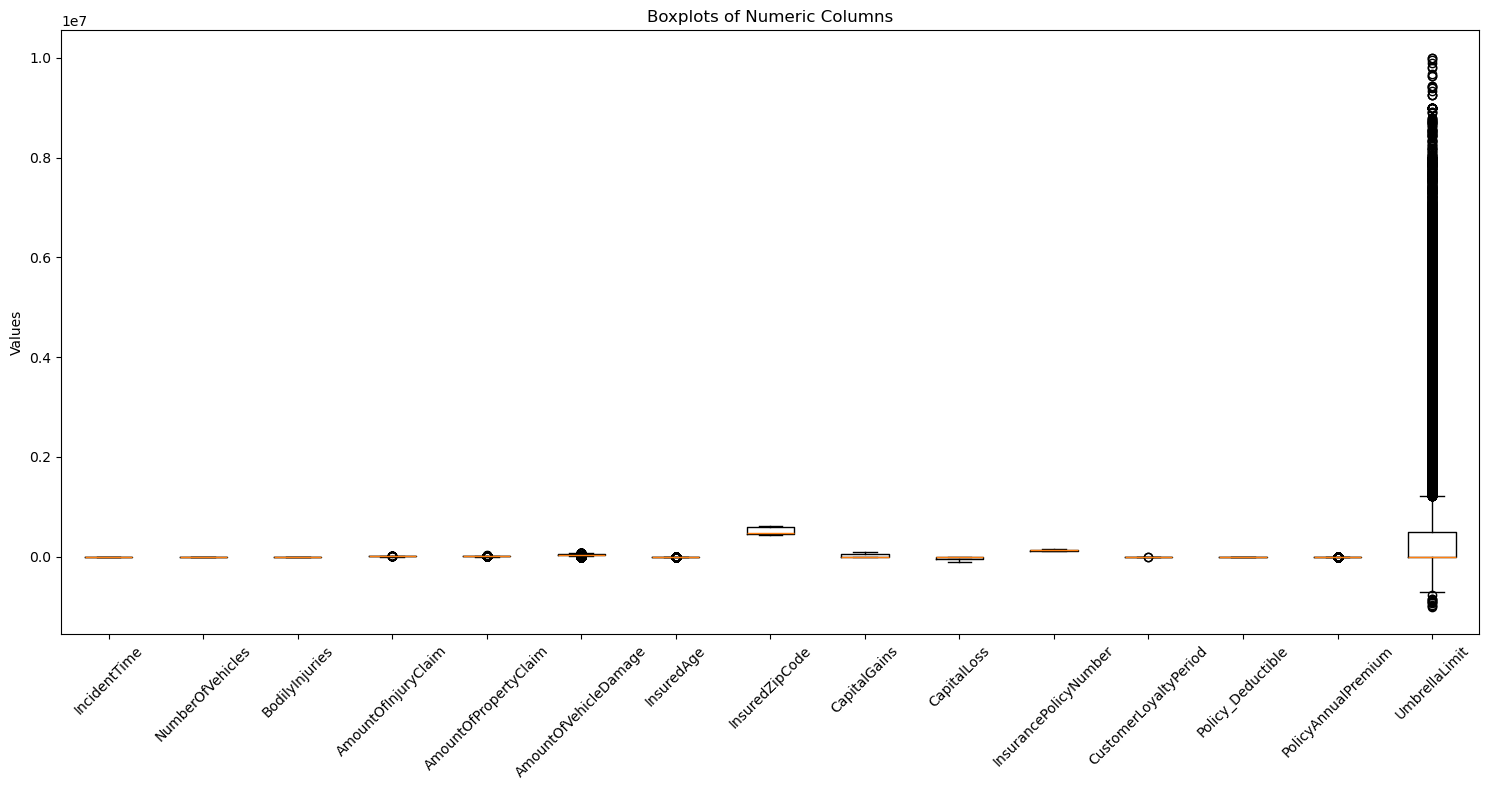

In [98]:
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
plt.boxplot([merged_df[col].dropna() for col in numeric_cols], labels=numeric_cols)
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Columns")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

## 2. Understanding the case study

###  Case study analysis
State the key points that you found in the case and how you intend to deal with them appropriately to address the client's needs. (You can include more than four points.) 200-300 words.

1.
1. 
1. 
1. 



## 3. Pre-processing applied

**Create a new subheading for each stage that you do from the following items. Enter your code in the cells below the subheading.**

- Merging, pivoting and melting, if necessary
- Preparing the labels appropriately, if necessary
- Dealing with missing values (imputation, filtering) without leaking, if necessary
- Dealing with duplicate values, if necessary
- Scaling, without leaking, if necessary
- Dealing with correlation and collinearity, if necessary
- Variance analysis, if necessary
- Appropriate feature selection such as RFE, if necessary
- Appropriate feature extraction, if necessary
- Identifying and dealing with class imbalance, if necessary
- Identifying and dealing with outliers, if necessary
- Categorical and numerical encoding if necessary
- Other pre-processing 

### Merging, pivoting and melting, if necessary

### Preparing the labels appropriately, if necessary

In [99]:
print(merged_df['ReportedFraud'].value_counts(dropna=False))
print(merged_df['ReportedFraud'].value_counts(normalize=True))

ReportedFraud
N    21051
Y     7785
Name: count, dtype: int64
ReportedFraud
N    0.730025
Y    0.269975
Name: proportion, dtype: float64


#### Above results suggest Target label is `imbalanced` with `Y is ~26% and N is ~73%` and no missing value

In [100]:
# Encode the Labels into binary 
merged_df['ReportedFraud'].map({'N' : 0 , 'Y' : 1})
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        26144 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

### Dealing with datatype conversions
 - DateOfIncident from Object  to Date Format
 - Witnesses from Object  to int64
 - AmountOfTotalClaim from Object  to float64
 - DateOfPolicyCoverage from Object  to Date Format
 - Policy_CombinedSingleLimit Split into 2 features
 - VehicleYOM from Object  to int64

In [101]:
class ColumnTypeConverter:
    def __init__(self, column_name, target_type='datetime', errors='coerce'):
        self.column_name = column_name
        self.target_type = target_type
        self.errors = errors

    def transform(self, df):
        if self.column_name not in df.columns:
            raise ValueError(f"Column '{self.column_name}' not found in DataFrame.")
        
        original_non_nulls = df[self.column_name].notna().sum()

        if self.target_type == 'datetime':
            df[self.column_name] = pd.to_datetime(df[self.column_name], errors=self.errors)
        elif self.target_type == 'int64':
            df[self.column_name] = pd.to_numeric(df[self.column_name], errors=self.errors).astype('Int64')
        elif self.target_type == 'float64':
            df[self.column_name] = pd.to_numeric(df[self.column_name], errors=self.errors).astype('float64')
        else:
            raise ValueError("target_type must be one of: 'datetime', 'int64', 'float64'")

        converted_non_nulls = df[self.column_name].notna().sum()
        failed_conversions = original_non_nulls - converted_non_nulls

        print(f"[{self.column_name}] Conversion Summary to '{self.target_type}':")
        print(f"✅ Successfully converted: {converted_non_nulls}")
        print(f"❌ Failed conversions (NaT or NaN): {failed_conversions}")
        
        return df


In [102]:
dateOfIncident = ColumnTypeConverter('DateOfIncident',target_type='datetime',errors='coerce')
dateOfPolicyCoverage = ColumnTypeConverter('DateOfPolicyCoverage',target_type='datetime',errors='coerce')
witnesses = ColumnTypeConverter('Witnesses',target_type='int64',errors='coerce')
vehicleYom = ColumnTypeConverter('VehicleYOM',target_type='int64',errors='coerce')
amountOfTotalClaim = ColumnTypeConverter('AmountOfTotalClaim',target_type='float64',errors='coerce')

dateOfIncident.transform(merged_df)
dateOfPolicyCoverage.transform(merged_df)
witnesses.transform(merged_df)
vehicleYom.transform(merged_df)
amountOfTotalClaim.transform(merged_df)
merged_df.info()

[DateOfIncident] Conversion Summary to 'datetime':
✅ Successfully converted: 28836
❌ Failed conversions (NaT or NaN): 0
[DateOfPolicyCoverage] Conversion Summary to 'datetime':
✅ Successfully converted: 28836
❌ Failed conversions (NaT or NaN): 0
[Witnesses] Conversion Summary to 'int64':
✅ Successfully converted: 28790
❌ Failed conversions (NaT or NaN): 46
[VehicleYOM] Conversion Summary to 'int64':
✅ Successfully converted: 28836
❌ Failed conversions (NaT or NaN): 0
[AmountOfTotalClaim] Conversion Summary to 'float64':
✅ Successfully converted: 28786
❌ Failed conversions (NaT or NaN): 50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CustomerID                  28836 non-null  object        
 1   DateOfIncident              28836 non-null  datetime64[ns]
 2   TypeOfIncident              28836 

##### ✅ Successful Conversions

- **DateOfIncident** and **DateOfPolicyCoverage**:  
  Fully converted to `datetime64[ns]`.

- **VehicleYOM**:  
  All values successfully converted to `Int64`.

- **Witnesses**:  
  Mostly successful; **46 missing** (`NaT` or `NaN`).

- **AmountOfTotalClaim**:  
  **50 values could not be converted** to `float64`.


###  Split Policy_CombinedSingleLimit into two separate numeric columns and drop Policy_CombinedSingleLimit
| Column                       | Reason to Drop                                                                                                                              |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| `CustomerID`                 | Pure identifier – no predictive value                                                                                                       |
| `InsurancePolicyNumber`      | Unique ID – may cause overfitting or leakage                                                                                                |
| `VehicleID`                  | Another unique identifier                                                                                                                   |
| `Policy_CombinedSingleLimit` | Needs to be split (e.g. into `LimitPerPerson`, `LimitPerAccident`) to be useful. |


In [103]:
# Split Policy_CombinedSingleLimit into 2 colums and drop then Policy_CombinedSingleLimit
merged_df[['LimitPerPerson', 'LimitPerAccident']] = merged_df['Policy_CombinedSingleLimit'].str.split('/', expand=True).astype(float)
merged_df[['LimitPerPerson', 'LimitPerAccident']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LimitPerPerson    28836 non-null  float64
 1   LimitPerAccident  28836 non-null  float64
dtypes: float64(2)
memory usage: 450.7 KB


##### ✅ Derived Features from `Policy_CombinedSingleLimit`

The original column was split into two new float columns:

| Column            | Non-Null Count | Dtype    | Description                         |
|------------------|----------------|----------|-------------------------------------|
| `LimitPerPerson` | 28836          | float64  | Insurance limit per person          |
| `LimitPerAccident` | 28836        | float64  | Insurance limit per accident        |

- All values successfully converted to `float64`
- No missing values detected
- Original column `Policy_CombinedSingleLimit` was dropped after transformation


##### 🗑️ Dropped Irrelevant or High-Cardinality Columns

To reduce noise and avoid overfitting, the following columns were removed:

| Column                    | Reason for Removal                             |
|---------------------------|------------------------------------------------|
| `Policy_CombinedSingleLimit` | Replaced by `LimitPerPerson` and `LimitPerAccident` |
| `CustomerID`             | Unique identifier, not useful for modeling     |
| `InsurancePolicyNumber`  | High-cardinality identifier, non-informative   |
| `VehicleID`              | Unique identifier, adds no predictive value    |



In [104]:
merged_df.drop(['Policy_CombinedSingleLimit','CustomerID','InsurancePolicyNumber','VehicleID'] , axis=1,inplace=True)
merged_df.columns

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud', 'LimitPerPerson', 'LimitPerAccident'],
      dtype='object')

In [105]:
## 🔄 Dealing with Correlation and Collinearity (If Necessary)

### 📌 Why It Matters
- Highly correlated features can cause **multicollinearity**, which may affect the performance and interpretability of linear models such as **logistic regression**.
- Reducing multicollinearity can lead to **more stable coefficients** and improved generalization.

---




SyntaxError: invalid syntax (1634674738.py, line 4)

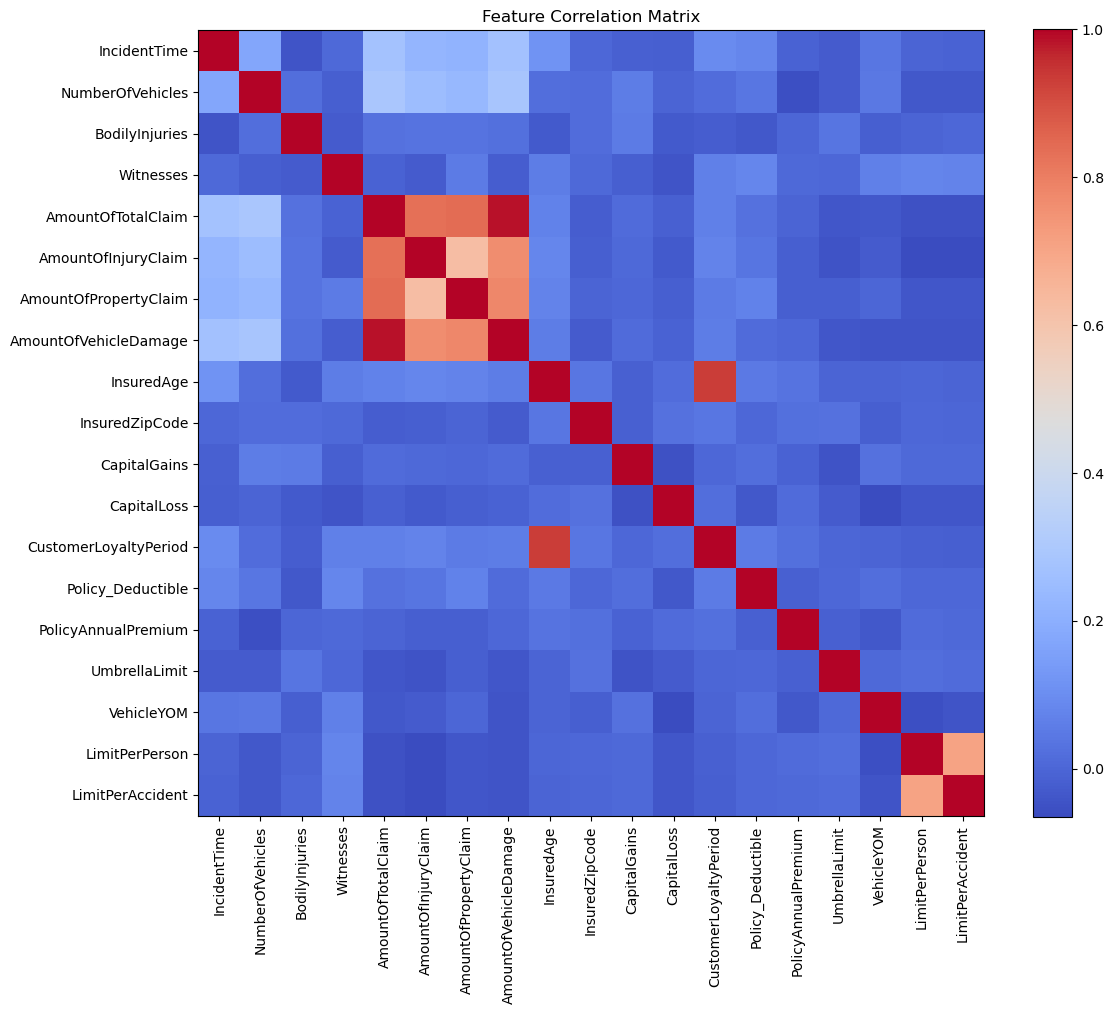

In [106]:
# Compute correlation matrix
corr_matrix = merged_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
plt.title("Feature Correlation Matrix")
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

CustomerLoyaltyPeriod -- > Insured Age
AmountOfVehicleDamage -- > AmountOfTotalClaim


##### 📊 Correlation Analysis Summary

A heatmap of the Pearson correlation matrix was generated for all numerical features. Below are key observations:

##### 🔺 Strong Positive Correlations (r > 0.8)
| Feature Pair                         | Interpretation                                  |
|-------------------------------------|-------------------------------------------------|
| `AmountOfTotalClaim` & `AmountOfVehicleDamage`   | Total claim heavily influenced by vehicle damage |
| `AmountOfTotalClaim` & `AmountOfPropertyClaim`   | Property claim is a major component of total     |

##### ⚠️ Suggested Actions
- **Drop or Combine Highly Correlated Features**:  
  Dropping `AmountOfTotalClaim` looks better choice  to avoid redundancy.

##### ✅ Low/No Concerning Correlation Among Others
- Most other feature pairs show low correlation, which is favorable for model stability.

---




In [107]:
merged_df.drop(['AmountOfTotalClaim'] , axis=1,inplace=True)
merged_df.columns

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud',
       'LimitPerPerson', 'LimitPerAccident'],
      dtype='object')

## 4. Technique 1
**Create a new subheading for each stage that you do from the following items. Enter your code in the cells below the subheading.**

- Motivation for choosing the technique and schematic figure of the analysis process (100-200 words)
- Setting hyperparameters (rationale)
- Optimising the hyperparameters appropriately
- Performance metrics for training set
- Other items necessary for the technique
- Deal with class imbalance, if necessary, if not done above

### 4.1 Motivation for choosing the technique and schematic figure of the analysis process

### Setting hyperparameters (rationale)

## 5. Technique 2
**Create a new subheading for each stage that you do from the following items. Enter your code in the cells below the subheading.**

- Motivation for choosing the technique and schematic figure of the analysis process (100-200 words)
- Setting hyperparameters (rationale)
- Optimising the hyperparameters appropriately
- Performance metrics for training set
- Other items necessary for the technique
- Deal with class imbalance, if necessary, if not done above

### 5.1 Motivation for choosing the technique and schematic figure of the analysis process

### Setting hyperparameters (rationale)

## 6. Comparison of metrics performance for testing

**Create a new subheading for each stage that you do from the following items. Enter your code in the cells below the subheading.**

- Use of nested cross-validation for both techniques to deal with overfitting model selection and model comparison
- Use appropriate metrics for the testing set
- Use an appropriate model selection visualisation curve (ROC, PR, etc.) that is suitable for the problem at hand
- Checking for overfitting

## 7. Final recommendation of the best model

**Create a new subheading for each item you discuss from the following items.**

- Technical perspective- overfitting discussion, complexity and efficiency
- Business perspective- results interpretation, relevance and balance with a technical perspective

## 8. Conclusion

**Create a new subheading for each item you discuss from the following items.**

- What has been successfully accomplished and what has not
- Reflect back on the analysis and see what you could have done differently if you were to do the project again
- Add a wish list of future work that you would do to take the project forward
